In [58]:
import numpy as np
import matplotlib.pyplot as plt

Experimento 1


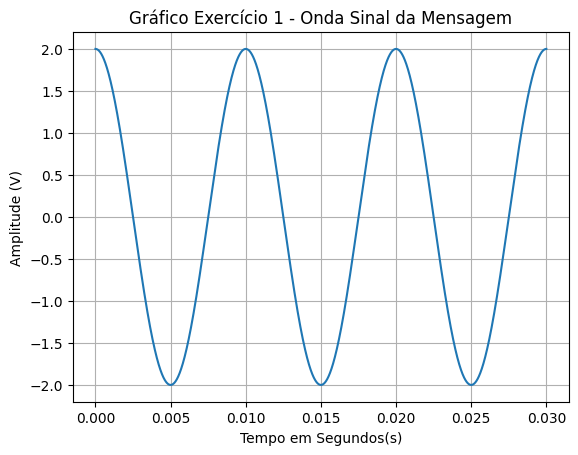

In [59]:
fm = 100
fc = 20000
A = 1
Em = 2
m = Em/A
N = 20000

Tm = 1/fm
t = np.linspace(0,3*Tm,N)

mensagem = Em*np.cos(2*np.pi*fm*t)

plt.plot(t, mensagem)
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal da Mensagem")
plt.grid(True)
plt.figure(1)
plt.show()

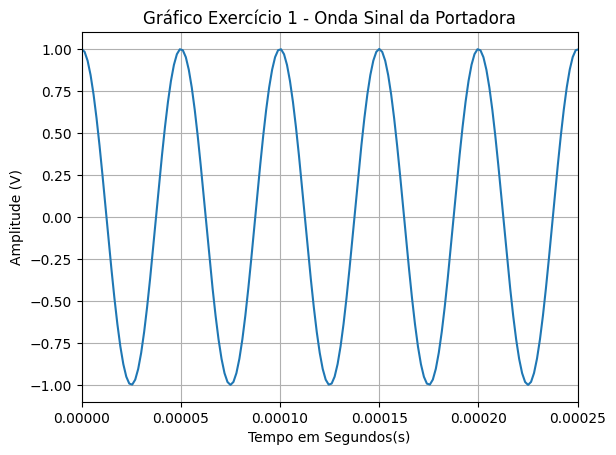

<Figure size 640x480 with 0 Axes>

In [60]:
portadora = A*np.cos(2*np.pi*fc*t)

plt.plot(t, portadora)
plt.xlim(0, 0.00025) 

plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal da Portadora")
plt.grid(True)
plt.figure(2)
plt.show()

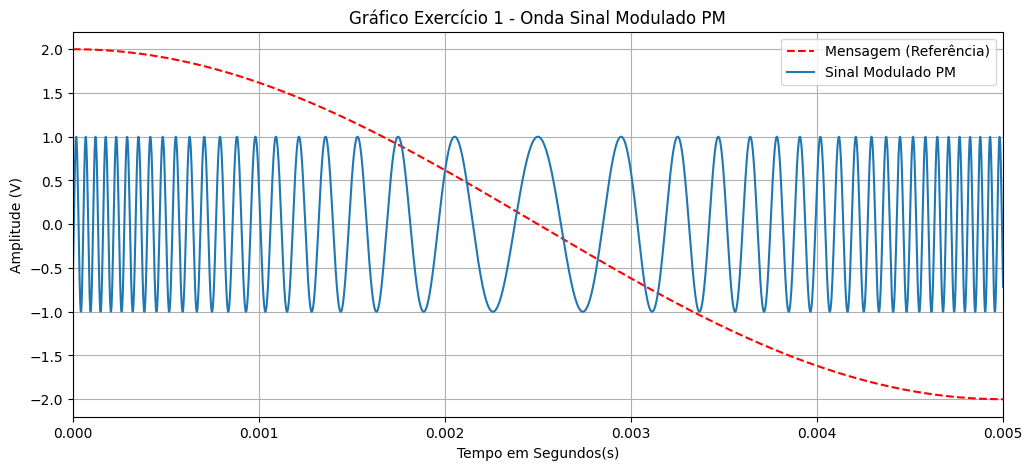

<Figure size 640x480 with 0 Axes>

In [61]:
Kp = 90

pm = A*np.cos(2*np.pi*fc*t + Kp*mensagem)

plt.figure(figsize=(12, 5))

plt.plot(t, mensagem, 'r--', label='Mensagem (Referência)')

plt.plot(t, pm, label='Sinal Modulado PM')

plt.xlim(0, 0.005) 

plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal Modulado PM")
plt.grid(True)
plt.legend()
plt.figure(3)
plt.show()


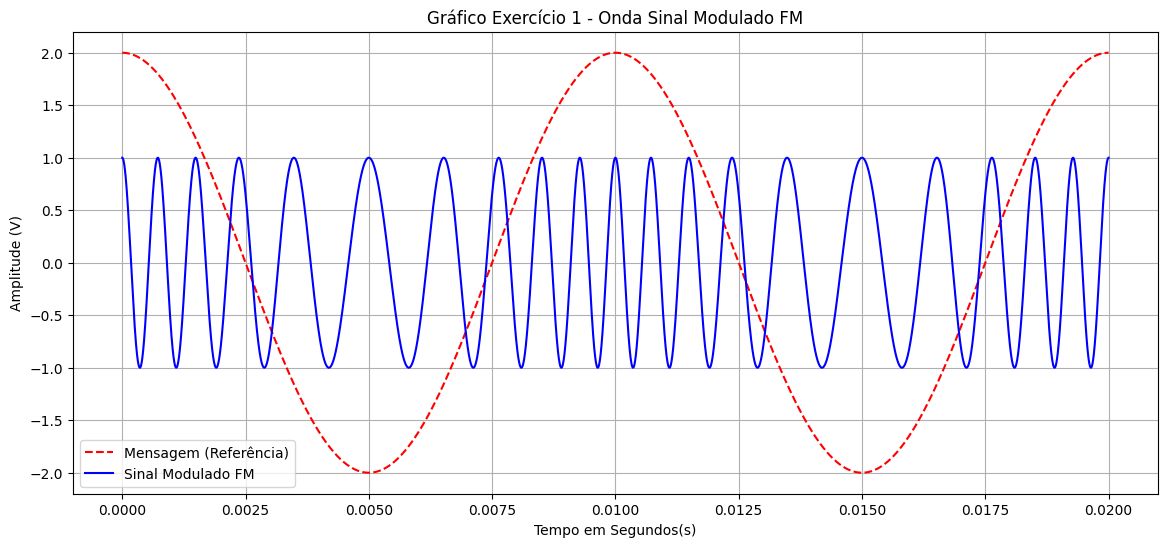

In [62]:
fc_vis = 1000  
Kf_vis = 400 * np.pi 

Tm_pm = 1/fm
t_pm = np.linspace(0, 2*Tm_pm, N)

mensagem_pm = Em * np.cos(2 * np.pi * fm * t_pm)

integral_mensagem = (Em / (2 * np.pi * fm)) * np.sin(2 * np.pi * fm * t_pm)
sinal_fm = A * np.cos(2 * np.pi * fc_vis * t_pm + Kf_vis * integral_mensagem)

plt.figure(figsize=(14, 6))

plt.plot(t_pm, mensagem_pm, 'r--', label='Mensagem (Referência)')

plt.plot(t_pm, sinal_fm, 'b-', label='Sinal Modulado FM')

plt.title("Gráfico Exercício 1 - Onda Sinal Modulado FM")
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.legend()
plt.show()

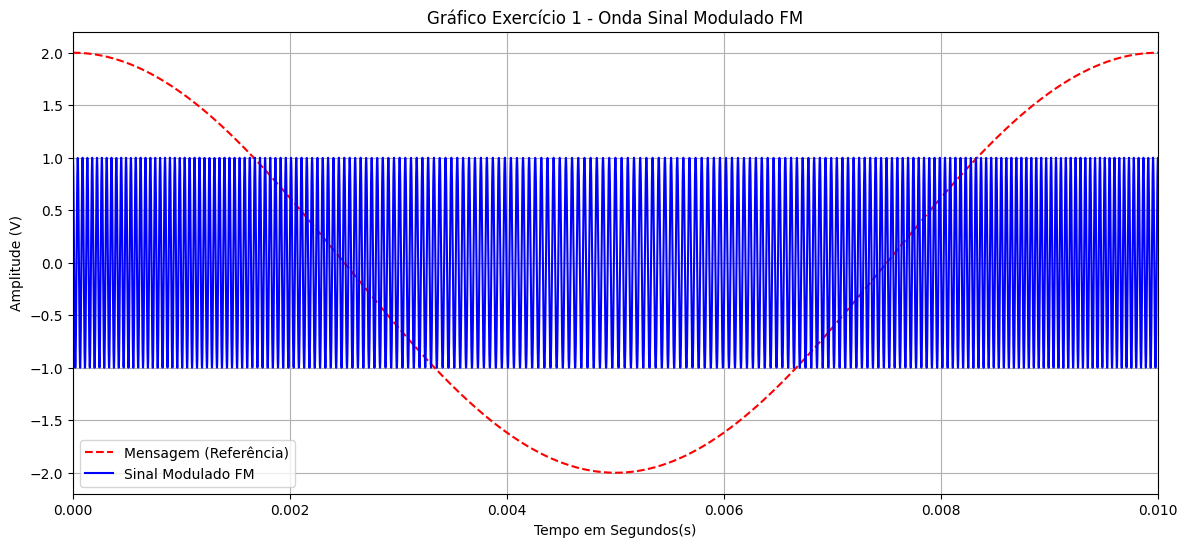

In [63]:
fc_vis = 20000  
Kf_vis = 2500 * np.pi 

Tm_pm = 1/fm
t_pm = np.linspace(0, 2*Tm_pm, N)

mensagem_pm = Em * np.cos(2 * np.pi * fm * t_pm)

integral_mensagem = (Em / (2 * np.pi * fm)) * np.sin(2 * np.pi * fm * t_pm)
sinal_fm = A * np.cos(2 * np.pi * fc_vis * t_pm + Kf_vis * integral_mensagem)

plt.figure(figsize=(14, 6))

plt.plot(t_pm, mensagem_pm, 'r--', label='Mensagem (Referência)')

plt.plot(t_pm, sinal_fm, 'b-', label='Sinal Modulado FM')
plt.xlim(0, 0.010) 

plt.title("Gráfico Exercício 1 - Onda Sinal Modulado FM")
plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.legend()

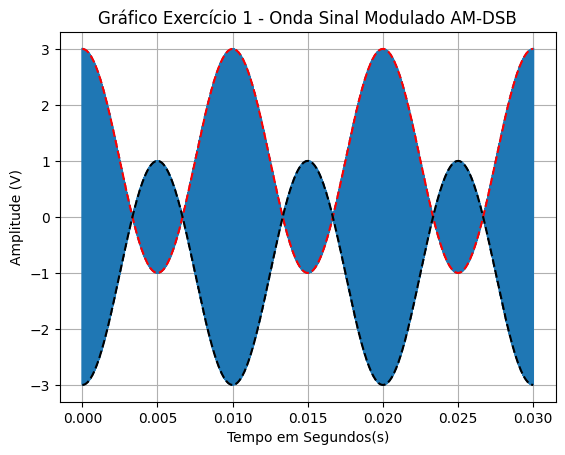

<Figure size 640x480 with 0 Axes>

In [64]:
mensagem_normalizada = np.cos(2*np.pi*fm*t) 
sinal_modulado = A * (1 + m * mensagem_normalizada) * np.cos(2*np.pi*fc*t)

envelope_superior = A * (1 + m * mensagem_normalizada)
envelope_inferior = -envelope_superior

plt.plot(t, sinal_modulado)

plt.plot(t, envelope_superior, color='red', linestyle='--', label='Envoltória')
plt.plot(t, envelope_inferior, color='black', linestyle='--')

plt.xlabel("Tempo em Segundos(s)")
plt.ylabel("Amplitude (V)")
plt.title("Gráfico Exercício 1 - Onda Sinal Modulado AM-DSB")
plt.grid(True)
plt.figure(5)
plt.show()

Experimento 2


AM (Modulação em Amplitude):
A informação está na amplitude da portadora.
Consequência: É vulnerável a ruídos que afetam a amplitude e pode sofrer distorção por sobremodulação.

PM e FM (Modulação Angular)
A informação está no ângulo (fase ou frequência) da portadora. 
Consequência: A amplitude é constante, o que garante alta imunidade a ruído. 

FM: A frequência do sinal varia com a amplitude da mensagem. 
PM: A frequência do sinal varia com a inclinação (derivada) da mensagem.

Principal Vantagem vs. Desvantagem
AM:
Vantagem: Receptores simples e de baixo custo.
Desvantagem: Baixa imunidade a ruído e ineficiência energética.
FM/PM:
Vantagem: Excelente imunidade a ruído e alta fidelidade (especialmente FM). 
Desvantagem: Ocupam maior largura de faixa no espectro e exigem circuitos mais complexos.

AM: Rádio AM  e comunicação aeronáutica.
FM: Rádio FM  e áudio de TV analógica.
PM: Principalmente como base para modulações digitais, usadas em Wi-Fi, 4G/5G e satélites.

Desafio


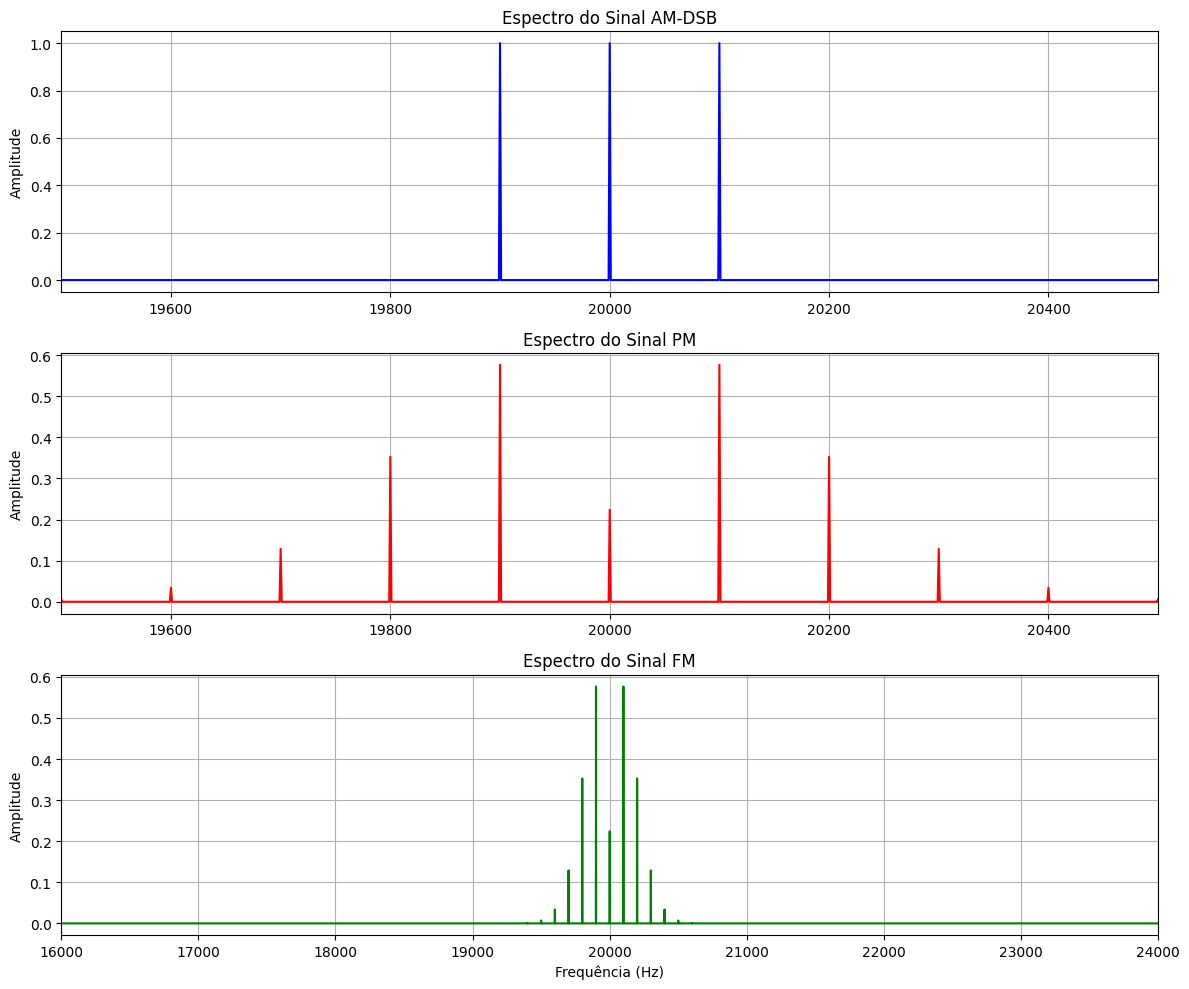

In [65]:
m = 2.0
Kp = 1.0                    
Kf = 200* np.pi                    
fs = 100000  
duration = 1.0    
N = int(fs * duration)
t = np.linspace(0, duration, N, endpoint=False)

mensagem = Em* np.cos(2 * np.pi * fm * t)
portadora = A * np.cos(2 * np.pi * fc * t)

integral_mensagem = (Em / (2 * np.pi * fm)) * np.sin(2 * np.pi * fm * t)

sinal_am = Em * (1 + (mensagem / Em) * m) * np.cos(2*np.pi*fc*t) 
sinal_pm = Em * np.cos(2 * np.pi * fc * t + Kp * mensagem)
sinal_fm = Em * np.cos(2 * np.pi * fc * t + Kf * integral_mensagem)

freqs = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))

spec_am = np.abs(np.fft.fftshift(np.fft.fft(sinal_am))) / N
spec_pm = np.abs(np.fft.fftshift(np.fft.fft(sinal_pm))) / N
spec_fm = np.abs(np.fft.fftshift(np.fft.fft(sinal_fm))) / N

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.title('Espectro do Sinal AM-DSB')
plt.plot(freqs, spec_am, 'b-')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(fc - 500, fc + 500) 

plt.subplot(3, 1, 2)
plt.title('Espectro do Sinal PM')
plt.plot(freqs, spec_pm, 'r-')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(fc - 500, fc + 500)

plt.subplot(3, 1, 3)
plt.title('Espectro do Sinal FM')
plt.plot(freqs, spec_fm, 'g-')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(fc - 4000, fc + 4000) 

plt.tight_layout()
plt.show()